# Home Loan Classification

# 
1. Housing Finance company which provide home loans for the houses that are present across all urban, semiurban and rural areas for their valued customers.
2. The company validates the eligibility of loan after customer applies for the loan. However, it consumes lot of time for the manual validation of eligibility process.
3. Hence, the company wants to automate the loan elibility process based on the customer information and identify the factors/customer segments who are eligible for taking the loan.
4. As banks would give loans to only those customers who are eligible so that they can be assured of getting the money back.
5. Hence, the more accurate we are in predicting the eligible customers, the more beneficial it would be for the company.

#  PROBLEM STATEMENT

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

# TYPE OF PROBLEM

The above problem is clearly classification problem as we need to classify whether the Loan_Status is yes or no. So this can be solved by any of the classification techniques like Logistic Regression, Random Forest , Decision Tree , SVM etc.

Its very important to know about the data columns before we step into the actual problem. Here we have 2 data sets given. One is the training data and the other is testing data.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,precision_score,recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
home_data=pd.read_csv('Train_Loan_Home.csv')
home_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA & Preprocessing

In [3]:
home_data.shape

(614, 13)

In [4]:
home_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Checking missing values
home_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

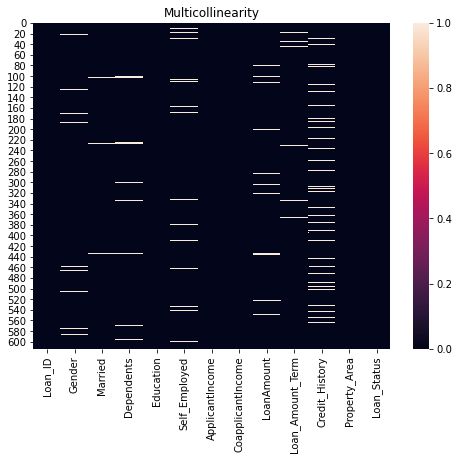

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(home_data.isnull(),)
plt.title('Multicollinearity');


- In above heatmap white lines shows us presence of null values 

In [8]:
#checking duplicates
home_data.duplicated().sum()

0

In [9]:
#dropping unnecessory columns
home_data.drop(labels='Loan_ID',axis=1,inplace=True)

In [10]:
home_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
#Extracting Categorical and numerical features
categorical_features=home_data.select_dtypes(include='object')
numeric_features=home_data.select_dtypes(include=['float','int64'])

In [12]:
categorical_features.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [13]:
#Unique categories in each categorical features
for i in categorical_features:
    print('{} Unique categories are present'.format(home_data[i].nunique()),'\n',home_data[i].unique())

2 Unique categories are present 
 ['Male' 'Female' nan]
2 Unique categories are present 
 ['No' 'Yes' nan]
4 Unique categories are present 
 ['0' '1' '2' '3+' nan]
2 Unique categories are present 
 ['Graduate' 'Not Graduate']
2 Unique categories are present 
 ['No' 'Yes' nan]
3 Unique categories are present 
 ['Urban' 'Rural' 'Semiurban']
2 Unique categories are present 
 ['Y' 'N']


In [14]:
numeric_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [15]:
#data types of numeric features
numeric_features.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [16]:
#memory used by columns in bytes
home_data.memory_usage()

Index                 128
Gender               4912
Married              4912
Dependents           4912
Education            4912
Self_Employed        4912
ApplicantIncome      4912
CoapplicantIncome    4912
LoanAmount           4912
Loan_Amount_Term     4912
Credit_History       4912
Property_Area        4912
Loan_Status          4912
dtype: int64

## 
- we have to change datatypes from float to integer
- for that first we will fill numerical missing values with median and categorical missing values with mode 

In [17]:
#filling numeric missing values with median
for i in numeric_features:
    home_data[i].fillna(home_data[i].median(),inplace=True)

#filling categorical missing values with mode
for i in categorical_features:
    home_data[i].fillna(home_data[i].mode().iloc[0],inplace=True)

In [18]:
home_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
numeric_features=home_data.select_dtypes(include=['int64','float'])

In [20]:
numeric_features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [21]:
#changing daya types from float to int to decrease memory usage
for i in numeric_features:
    home_data[i]= home_data[i].astype('int')

In [22]:
home_data.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int32
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

# 
- we have converted necessory columns from float to integer

In [23]:
home_data.memory_usage()

Index                 128
Gender               4912
Married              4912
Dependents           4912
Education            4912
Self_Employed        4912
ApplicantIncome      2456
CoapplicantIncome    2456
LoanAmount           2456
Loan_Amount_Term     2456
Credit_History       2456
Property_Area        4912
Loan_Status          4912
dtype: int64

In [24]:
# Data after filling missing values and changing data types
home_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [25]:
# replacing object to integer in column 'Dependents'
home_data['Dependents']=home_data['Dependents'].replace('3+',3)
home_data['Dependents']=home_data['Dependents'].astype('int')

In [26]:
home_data.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
ApplicantIncome       int32
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object

In [27]:
# Descriptive statistics
des_stat=home_data.describe()
des_stat

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.24430,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.24876,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.50000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000


In [28]:
#Checking relationship between input features
corr = home_data.corr()
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030429,0.163103,-0.103864,-0.040160
ApplicantIncome,0.118202,1.000000,-0.116604,0.565181,-0.046531,-0.018615
CoapplicantIncome,0.030429,-0.116604,1.000000,0.189218,-0.059382,0.011134
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.103864,-0.046531,-0.059382,0.036960,1.000000,-0.004705
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000


# Data Visualization

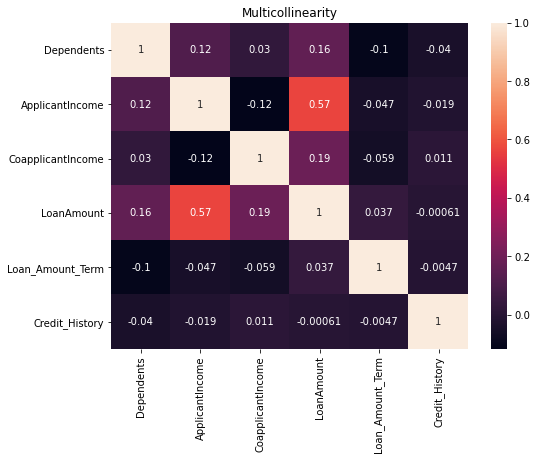

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
plt.title('Multicollinearity');

#### 
- There is no multicollinearity between input features

In [30]:
numeric_features=home_data.select_dtypes(include='int')
numeric_features.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0,128,360,1
1,1,4583,1508,128,360,1
2,0,3000,0,66,360,1
3,0,2583,2358,120,360,1
4,0,6000,0,141,360,1


### Univariate / Bivariate / Multivariate Analysis

In [31]:
def dist_plot(column):
    plt.figure(figsize=(5,5))
    sns.distplot(column,hist=False,color='Green')
    plt.title('Dist_Plot')
    
    
    
    
def normality(column):
    skewness=column.skew()
    kurtosis=column.kurtosis()
    if skewness < -1 :
        print('For column {} the Value of skewness is {};so the distribution is negatively skewed.'.format(column.name,skewness))
    elif skewness > 1:
        print('For column {} the Value of skewness is {};so the distribution is positively skewed.'.format(column.name,skewness))
    else:
        print('For column {} the value of skewness is {};so the distribution is Symmetric'.format(column.name,skewness))
    if kurtosis < -3 :
        print('For column {} ,the Value of kurtosis is {};so distribution is Platyokurtic.'.format(column.name,kurtosis))
    elif kurtosis > 3:
        print('For column {} the Value of kurtosis is {};so distribution is Leptokurtic.'.format(column.name,kurtosis))
    else:
        print('for column {} the value of kurtosis is {}; so distribution is Mesokurtic(Gaussian Ditribution)'.format(column.name,kurtosis))

For column ApplicantIncome the Value of skewness is 6.539513113994625;so the distribution is positively skewed.
For column ApplicantIncome the Value of kurtosis is 60.54067593369113;so distribution is Leptokurtic.


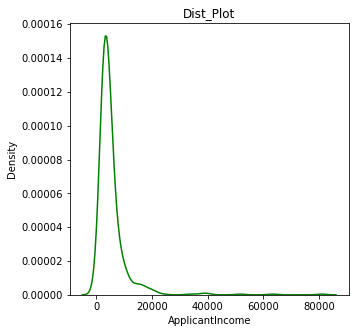

In [32]:
dist_plot(home_data['ApplicantIncome'])
normality(home_data['ApplicantIncome'])

For column CoapplicantIncome the Value of skewness is 7.491529631159513;so the distribution is positively skewed.
For column CoapplicantIncome the Value of kurtosis is 84.95635270560676;so distribution is Leptokurtic.


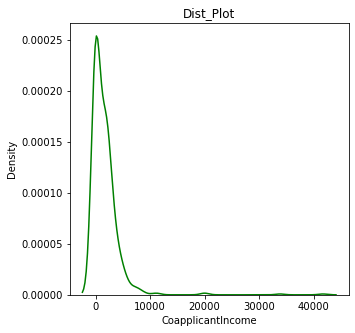

In [33]:
dist_plot(home_data['CoapplicantIncome'])
normality(home_data['CoapplicantIncome'])

For column LoanAmount the Value of skewness is 2.743052748820892;so the distribution is positively skewed.
For column LoanAmount the Value of kurtosis is 10.936694906900337;so distribution is Leptokurtic.


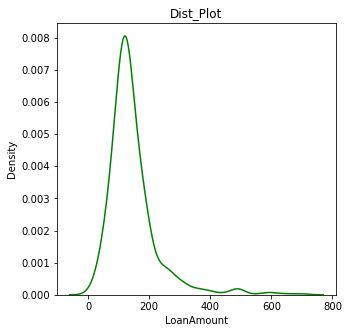

In [34]:
dist_plot(home_data['LoanAmount'])
normality(home_data['LoanAmount'])

For column Loan_Amount_Term the Value of skewness is -2.4021122563890396;so the distribution is negatively skewed.
For column Loan_Amount_Term the Value of kurtosis is 6.924993328965206;so distribution is Leptokurtic.


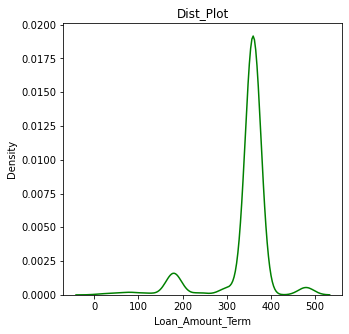

In [35]:
dist_plot(home_data['Loan_Amount_Term'])
normality(home_data['Loan_Amount_Term'])

## 
- So here we can transform our data either by using log transformation or StandardSclar to get it into symmetric form

#### Count plots 

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


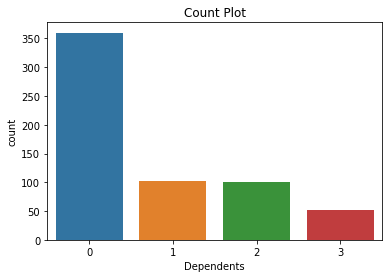

In [36]:
print(home_data['Dependents'].value_counts())
sns.countplot(data=home_data,x='Dependents')
plt.title('Count Plot');

1    525
0     89
Name: Credit_History, dtype: int64


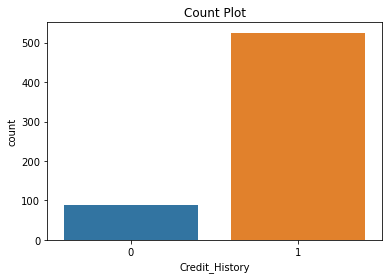

In [37]:
print(home_data['Credit_History'].value_counts())
sns.countplot(data=home_data,x='Credit_History')
plt.title('Count Plot');

In [38]:
categorical_features=home_data.select_dtypes(include='object')
categorical_features.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [39]:
def count_plot(data,column):
    sns.countplot(data=data,x=column)
    plt.title('Count Plot of {}'.format(column))
    print(data[column].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64


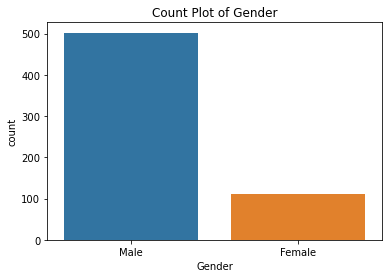

In [40]:
count_plot(home_data,'Gender')

Yes    401
No     213
Name: Married, dtype: int64


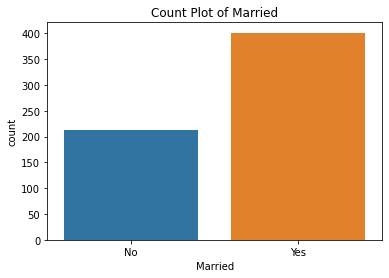

In [41]:
count_plot(home_data,'Married')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


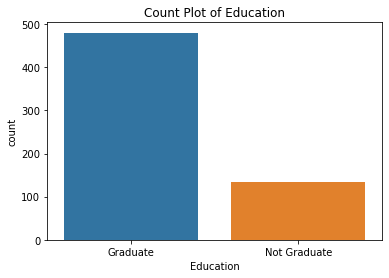

In [42]:
count_plot(home_data,'Education')

No     532
Yes     82
Name: Self_Employed, dtype: int64


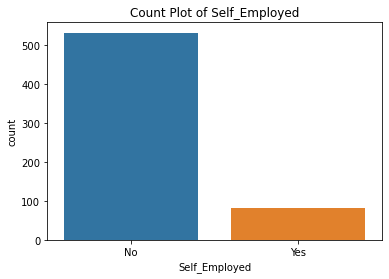

In [43]:
count_plot(home_data,'Self_Employed')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


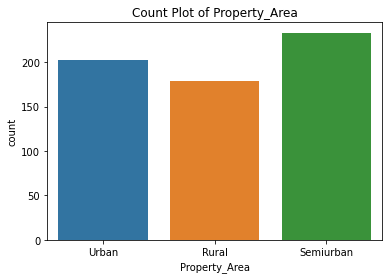

In [44]:
count_plot(home_data,'Property_Area')

Y    422
N    192
Name: Loan_Status, dtype: int64


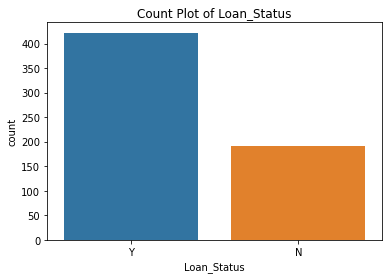

In [45]:
#Output feature
count_plot(home_data,'Loan_Status')

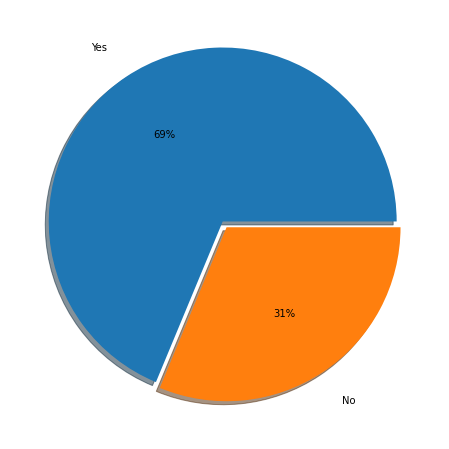

In [46]:
plt.figure(figsize=(8,8))
plt.pie(x = home_data['Loan_Status'].value_counts(),
        labels=['Yes','No'],autopct='%1.0f%%', labeldistance=1.2,explode=[0.02,0.02],shadow=True);

### For output feature (Loan Status);data is highly imbalanced

In [47]:
#home_data[home_data['Gender']=='Male'] ['ApplicantIncome'].mean()

In [48]:
# Average amounts by Gender
groupby_gender=home_data.groupby('Gender')
groupby_gender[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Gender,,,,
Female,4643.473214,1108.008929,126.732143,352.500000
Male,5573.017928,1735.750996,149.996016,340.159363


##### The above table shows the mean amount of each gender  for each column
eg : Average income of Female and Male is 4643.473214 & 5573.017928 respectively.

In [49]:
# average amount by marital status
avg_marrital_status=home_data.groupby('Married')
avg_marrital_status[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Married,,,,
No,4970.384977,1316.558685,128.85446,351.323944
Yes,5633.496259,1783.084788,154.72818,337.675810


In [50]:
#average income by education status
avg_education=home_data.groupby('Education')
avg_education[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Education,,,,
Graduate,5857.433333,1717.472917,153.245833,344.925000
Not Graduate,3777.283582,1276.544776,118.910448,333.402985


In [51]:
#average amounts by self employment
avg_employment=home_data.groupby('Self_Employed')
avg_employment[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Self_Employed,,,,
No,5098.678571,1639.725564,141.954887,343.263158
Yes,7380.817073,1501.341463,170.390244,336.878049


##### 
- In below count plot we will pass the process for columns 'Property_Area' and 'Loan_Status'
and will use count plot for other cat features

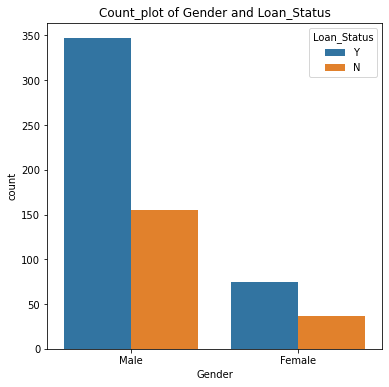

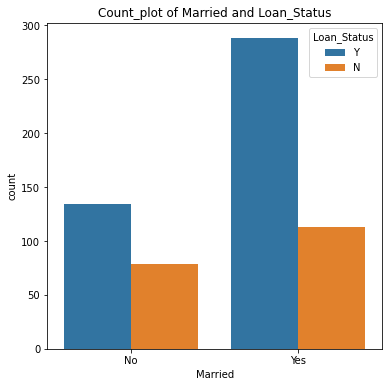

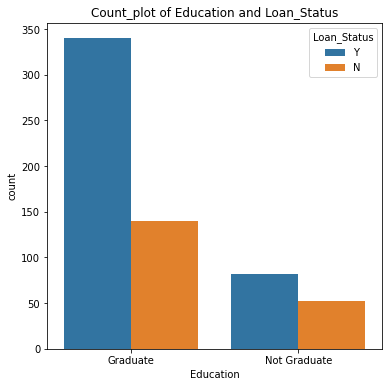

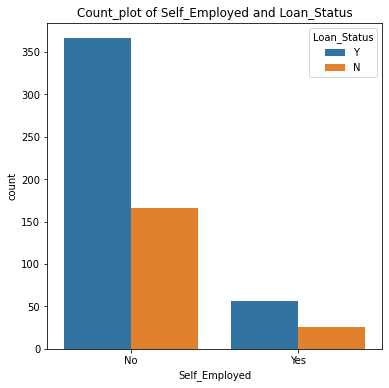

In [52]:
for i in categorical_features:
    if i=='Property_Area':
        pass
    elif i=='Loan_Status':
        pass
    else:
        plt.figure(figsize=(6,6))
        sns.countplot(x=i,data=home_data,hue='Loan_Status')
        plt.title('Count_plot of {} and Loan_Status'.format(i))

1) First plot shows count of Gender for each Loan status

2) Second plot shows count of Marrital status for each Loan status

3) Thord plot shows count of Educational status for each Loan status

4) Fourth plot shows count of Employment for each Loan status

In [53]:
categorical_features

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


##### Now we will transform our categorical features into numeric variables  by using encoding technique

In [54]:
#We will make copy of our original dataset and will use it for further prcess
home_data_copy=home_data.copy()

In [55]:
#Transforming Categorical features into numeric
label_encoder = LabelEncoder()

home_data_copy['Gender']= label_encoder.fit_transform(home_data_copy['Gender'])
home_data_copy['Married']= label_encoder.fit_transform(home_data_copy['Married'])
home_data_copy['Education']= label_encoder.fit_transform(home_data_copy['Education'])
home_data_copy['Self_Employed']= label_encoder.fit_transform(home_data_copy['Self_Employed'])
home_data_copy['Property_Area']= label_encoder.fit_transform(home_data_copy['Property_Area'])
home_data_copy['Loan_Status']= label_encoder.fit_transform(home_data_copy['Loan_Status'])

In [56]:
home_data_copy.tail()   # last 5 columns of transformed data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1
613,0,0,0,0,1,4583,0,133,360,0,1,0


## Spliting data into training and testing 

In [57]:
X = home_data_copy.iloc[:,:-1]
y = home_data_copy.iloc[:,-1:]

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

In [59]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(491, 11)
(491, 1)
(123, 11)
(123, 1)


### Fitting Different Classification Models on Imbalanced data

In [60]:
def run_Logistic(X_train,y_train,X_test,y_test):
    log_model = LogisticRegression(random_state=42)
    log_model.fit(X_train,y_train)                   # training model
    
    y_pred = log_model.predict(X_test) 
    y_pred_train = log_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')

     #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4),'\n')
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')
    
    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,log_model.predict_proba (X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'logistic model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    
    
def run_Decision_tree(X_train,y_train,X_test,y_test):
    dt_model = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=42)
    dt_model.fit(X_train,y_train)
    
    y_pred = dt_model.predict(X_test)
    y_pred_train = dt_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')  
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')
    #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4),'\n')
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')

    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,dt_model.predict_proba (X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'DT model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    
    
def run_Random_forest(X_train,y_train,X_test,y_test):
    rf_model = RandomForestClassifier(max_depth=5,random_state=42,criterion='entropy')
    rf_model.fit(X_train,y_train)
    
    y_pred = rf_model.predict(X_test)
    y_pred_train = rf_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')    
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')
     #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4))
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')

    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,rf_model.predict_proba (X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'RF model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')  
    
    
def run_gradient_b(X_train,y_train,X_test,y_test):
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train,y_train)
    
    y_pred = gb_model.predict(X_test)
    y_pred_train = gb_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')   
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')
     #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4),'\n')
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')

    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,gb_model.predict_proba (X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'DT model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    
def run_adaboost(X_train,y_train,X_test,y_test):
    adb_model = AdaBoostClassifier(random_state=42)
    adb_model.fit(X_train,y_train)
    
    y_pred = adb_model.predict(X_test)
    y_pred_train = adb_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')
     #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4),'\n')
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')

    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,adb_model.predict_proba (X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'ADB model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    
    
def run_SVC(X_train,y_train,X_test,y_test):
    svc_model = SVC(probability=True,random_state=42)
    svc_model.fit(X_train,y_train)
    
    y_pred = svc_model.predict(X_test)
    y_pred_train = svc_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')    
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')
     #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4),'\n')
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')

    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,svc_model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'SVC model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    
def run_knn(X_train,y_train,X_test,y_test):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train,y_train)
    
    y_pred = knn_model.predict(X_test)
    y_pred_train = knn_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')    
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')
     #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n','\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4),'\n')
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')
    
    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,knn_model.predict_proba (X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'KNN model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    
def run_xgb(X_train,y_train,X_test,y_test):
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train,y_train)
    
    y_pred = xgb_model.predict(X_test)
    y_pred_train = xgb_model.predict(X_train)# Predictions
    
    print('Training Score :',round(accuracy_score(y_train,y_pred_train),4),'\n')    
    print('Accuracy :',round(accuracy_score(y_test,y_pred),4),'\n')
     #Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])                                         
    cm_display.plot()
    plt.show()
    #Accuracy
    print('Precision Score :',round(precision_score(y_test,y_pred),4),'\n','\n')
    print('Recall Score :',round(recall_score(y_test,y_pred),4),'\n')
    print('Classification Report : ','\n',classification_report(y_test,y_pred),'\n')
    print('ROC_AUC Score :',round(roc_auc_score(y_test,y_pred),4),'\n')
    
    print('ROC_AUC Curve :\n')
    fpr,tpr,thresholds = roc_curve(y_test,xgb_model.predict_proba (X_test)[:,1])
    auc = roc_auc_score(y_test,y_pred)
    plt.plot(fpr,tpr,color = 'blue',label = 'KNN model (area = %0.2f)'%auc)
    plt.plot([0,1],[0, 1],'k--')
    plt.xlabel('False Positive Rate or [1 -True Negative Rate]')
    plt.ylabel('True Positive Rate')

## Logistic Regression

Training Score : 0.7984 

Accuracy : 0.8618 



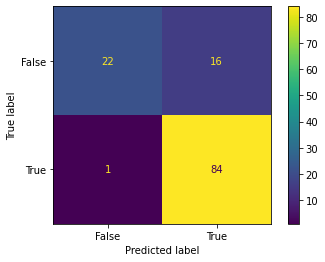

Precision Score : 0.84 

Recall Score : 0.9882 

Classification Report :  
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123
 

ROC_AUC Score : 0.7836 

ROC_AUC Curve :



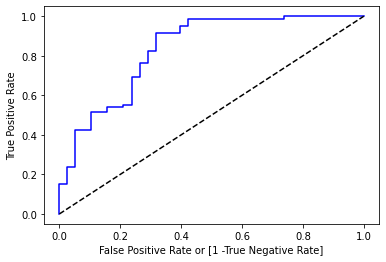

In [61]:
run_Logistic(X_train,y_train,X_test,y_test)

## DT Classifier

Training Score : 0.8248 

Accuracy : 0.8211 



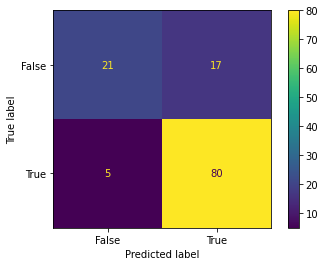

Precision Score : 0.8247 

Recall Score : 0.9412 

Classification Report :  
               precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123
 

ROC_AUC Score : 0.7469 

ROC_AUC Curve :



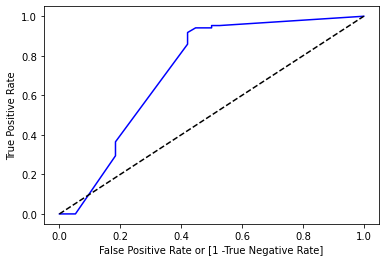

In [62]:
run_Decision_tree(X_train,y_train,X_test,y_test)

## RF Classifier

Training Score : 0.8065 

Accuracy : 0.8537 



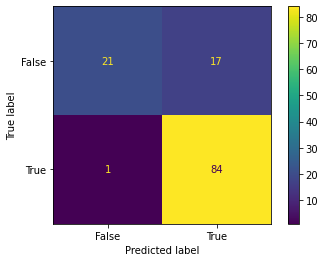

Precision Score : 0.8317 

Recall Score : 0.9882
Classification Report :  
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123
 

ROC_AUC Score : 0.7704 

ROC_AUC Curve :



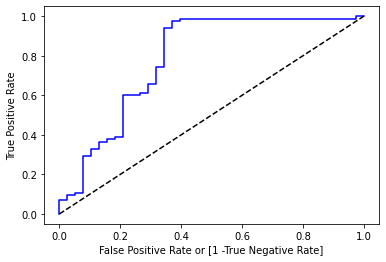

In [63]:
run_Random_forest(X_train,y_train,X_test,y_test)

## Gradient Boosting Classifier

Training Score : 0.9002 

Accuracy : 0.7967 



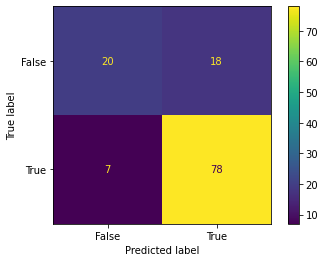

Precision Score : 0.8125 

Recall Score : 0.9176 

Classification Report :  
               precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.81      0.92      0.86        85

    accuracy                           0.80       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.79      0.80      0.79       123
 

ROC_AUC Score : 0.722 

ROC_AUC Curve :

Wall time: 955 ms


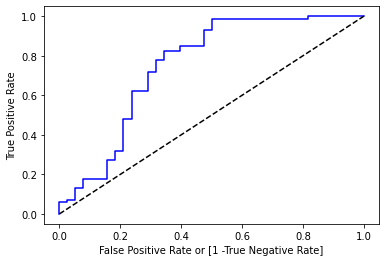

In [64]:
%%time
run_gradient_b(X_train,y_train,X_test,y_test)

## Adaboost Classifier

Training Score : 0.8228 

Accuracy : 0.8293 



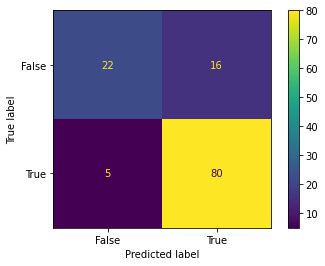

Precision Score : 0.8333 

Recall Score : 0.9412 

Classification Report :  
               precision    recall  f1-score   support

           0       0.81      0.58      0.68        38
           1       0.83      0.94      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.76      0.78       123
weighted avg       0.83      0.83      0.82       123
 

ROC_AUC Score : 0.7601 

ROC_AUC Curve :



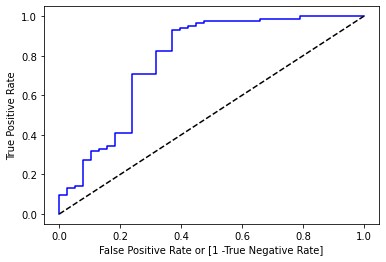

In [65]:
run_adaboost(X_train,y_train,X_test,y_test)

## XGB Classifier

Training Score : 1.0 

Accuracy : 0.813 



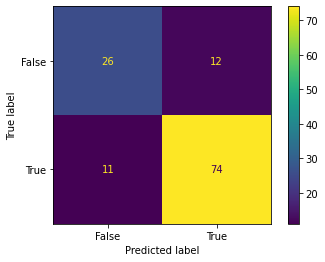

Precision Score : 0.8605 
 

Recall Score : 0.8706 

Classification Report :  
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        38
           1       0.86      0.87      0.87        85

    accuracy                           0.81       123
   macro avg       0.78      0.78      0.78       123
weighted avg       0.81      0.81      0.81       123
 

ROC_AUC Score : 0.7774 

ROC_AUC Curve :

Wall time: 921 ms


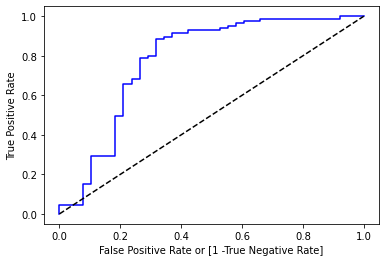

In [66]:
%%time
run_xgb(X_train,y_train,X_test,y_test)

## SVC Classifier

Training Score : 0.6904 

Accuracy : 0.6911 



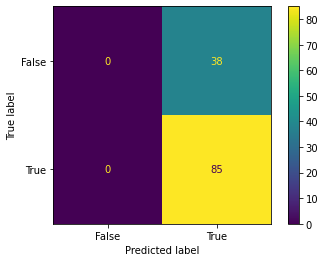

Precision Score : 0.6911 

Recall Score : 1.0 

Classification Report :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123
 

ROC_AUC Score : 0.5 

ROC_AUC Curve :



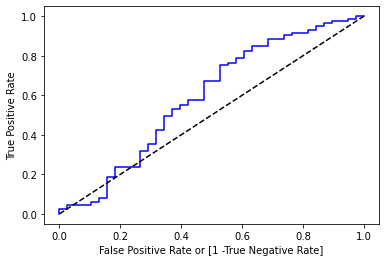

In [67]:
run_SVC(X_train,y_train,X_test,y_test)

## KNN Classifier

Training Score : 0.7149 

Accuracy : 0.6504 



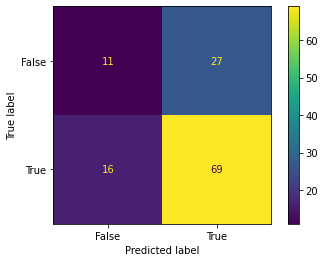

Precision Score : 0.7188 
 

Recall Score : 0.8118 

Classification Report :  
               precision    recall  f1-score   support

           0       0.41      0.29      0.34        38
           1       0.72      0.81      0.76        85

    accuracy                           0.65       123
   macro avg       0.56      0.55      0.55       123
weighted avg       0.62      0.65      0.63       123
 

ROC_AUC Score : 0.5506 

ROC_AUC Curve :



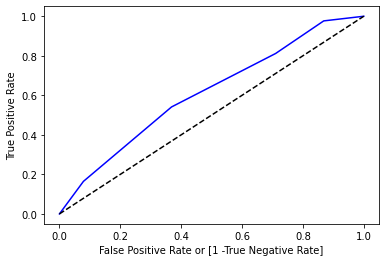

In [68]:
run_knn(X_train,y_train,X_test,y_test)

### 
For above Model Building||Model Training||Model Testing part we use our cleaned  but imbalanced data;
among all the Classifiers, we can say that XGB Classifier and Random Forest Classifier gives us best Accuracy,
Precision and Recall value (Since our data is imbalanced we can't consider only 'Accuracy',we have to check precision,recall and f1 score)

# Now we use SMOTE technique to handle Imbalance data

In [69]:
home_data_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


In [70]:
#OverSampling minority class by SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote,y_smote=smote.fit_resample(X,y)

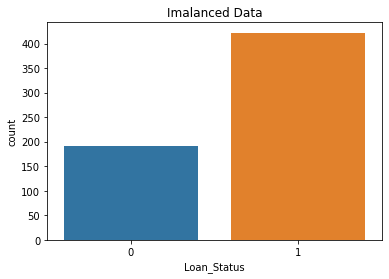

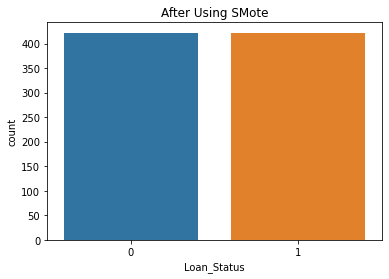

Data is balanced now


In [71]:
#Before balancing
sns.countplot(data=home_data_copy,x='Loan_Status')
plt.title('Imalanced Data')
plt.show()

#After using SMOTE
sns.countplot(data=y_smote,x='Loan_Status')
plt.title('After Using SMote')
plt.show()
print('Data is balanced now')

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,random_state=42,stratify=y_smote,test_size=0.20)

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(675, 11)
(675, 1)
(169, 11)
(169, 1)


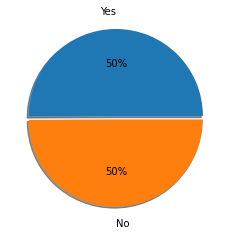

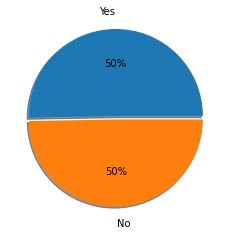

In [74]:
plt.pie(x = y_train['Loan_Status'].value_counts(),
        labels=['Yes','No'],autopct='%1.0f%%', labeldistance=1.2,explode=[0.02,0.02],shadow=True);
plt.show()
plt.pie(x = y_test['Loan_Status'].value_counts(),
        labels=['Yes','No'],autopct='%1.0f%%', labeldistance=1.2,explode=[0.02,0.02],shadow=True)
plt.show()

In above piecharts we can clearly see that our training and testing data has 50% of positive and 50% of negavtive values

# LogisticRegression

Training Score : 0.7852 

Accuracy : 0.7811 



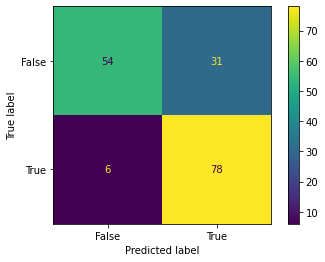

Precision Score : 0.7156 

Recall Score : 0.9286 

Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.64      0.74        85
           1       0.72      0.93      0.81        84

    accuracy                           0.78       169
   macro avg       0.81      0.78      0.78       169
weighted avg       0.81      0.78      0.78       169
 

ROC_AUC Score : 0.7819 

ROC_AUC Curve :



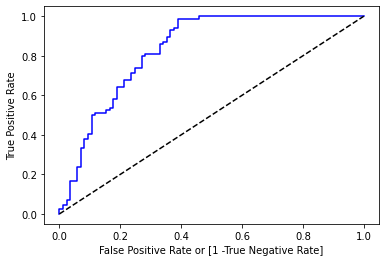

In [75]:
run_Logistic(X_train,y_train,X_test,y_test)

# DecisionTreeClassifier

Training Score : 0.8474 

Accuracy : 0.7751 



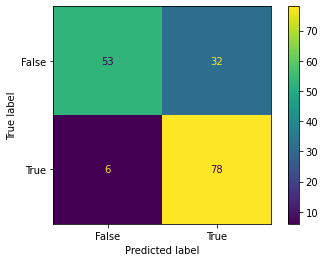

Precision Score : 0.7091 

Recall Score : 0.9286 

Classification Report :  
               precision    recall  f1-score   support

           0       0.90      0.62      0.74        85
           1       0.71      0.93      0.80        84

    accuracy                           0.78       169
   macro avg       0.80      0.78      0.77       169
weighted avg       0.80      0.78      0.77       169
 

ROC_AUC Score : 0.7761 

ROC_AUC Curve :



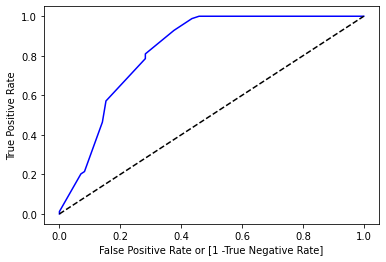

In [76]:
run_Decision_tree(X_train,y_train,X_test,y_test)

# RandomForestClassifier

Training Score : 0.843 

Accuracy : 0.7988 



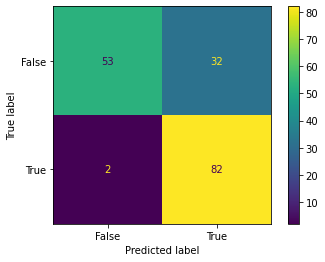

Precision Score : 0.7193 

Recall Score : 0.9762
Classification Report :  
               precision    recall  f1-score   support

           0       0.96      0.62      0.76        85
           1       0.72      0.98      0.83        84

    accuracy                           0.80       169
   macro avg       0.84      0.80      0.79       169
weighted avg       0.84      0.80      0.79       169
 

ROC_AUC Score : 0.7999 

ROC_AUC Curve :



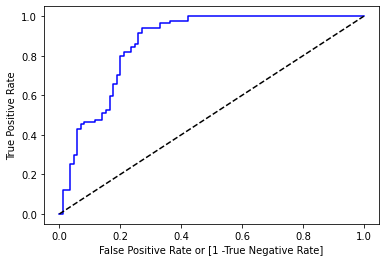

In [77]:
run_Random_forest(X_train,y_train,X_test,y_test)

# GradientBoostingClassifier

Training Score : 0.9037 

Accuracy : 0.7988 



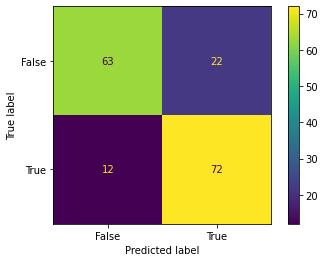

Precision Score : 0.766 

Recall Score : 0.8571 

Classification Report :  
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        85
           1       0.77      0.86      0.81        84

    accuracy                           0.80       169
   macro avg       0.80      0.80      0.80       169
weighted avg       0.80      0.80      0.80       169
 

ROC_AUC Score : 0.7992 

ROC_AUC Curve :

Wall time: 974 ms


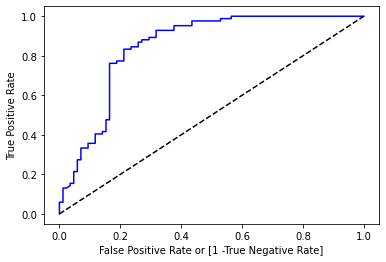

In [78]:
%%time
run_gradient_b(X_train,y_train,X_test,y_test)

# AdaBoostClassifier

Training Score : 0.8622 

Accuracy : 0.8284 



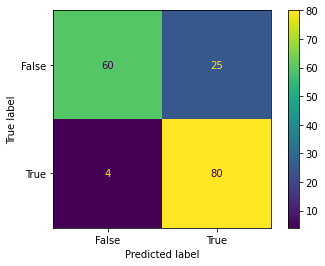

Precision Score : 0.7619 

Recall Score : 0.9524 

Classification Report :  
               precision    recall  f1-score   support

           0       0.94      0.71      0.81        85
           1       0.76      0.95      0.85        84

    accuracy                           0.83       169
   macro avg       0.85      0.83      0.83       169
weighted avg       0.85      0.83      0.83       169
 

ROC_AUC Score : 0.8291 

ROC_AUC Curve :



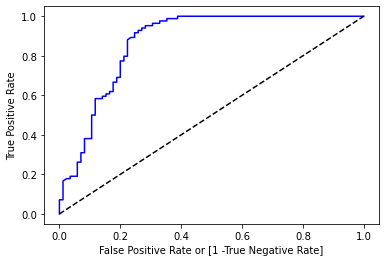

In [79]:
run_adaboost(X_train,y_train,X_test,y_test)

# XGBClassifier

Training Score : 1.0 

Accuracy : 0.8343 



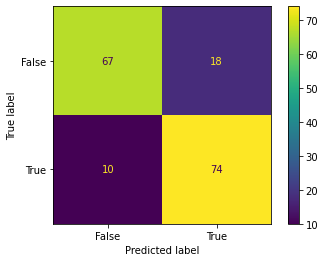

Precision Score : 0.8043 
 

Recall Score : 0.881 

Classification Report :  
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        85
           1       0.80      0.88      0.84        84

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169
 

ROC_AUC Score : 0.8346 

ROC_AUC Curve :

Wall time: 934 ms


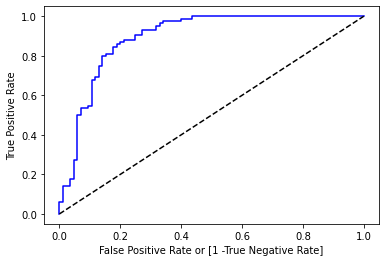

In [80]:
%%time
run_xgb(X_train,y_train,X_test,y_test)

# SVC

Training Score : 0.56 

Accuracy : 0.5325 



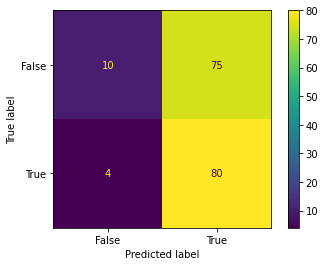

Precision Score : 0.5161 

Recall Score : 0.9524 

Classification Report :  
               precision    recall  f1-score   support

           0       0.71      0.12      0.20        85
           1       0.52      0.95      0.67        84

    accuracy                           0.53       169
   macro avg       0.62      0.54      0.44       169
weighted avg       0.62      0.53      0.43       169
 

ROC_AUC Score : 0.535 

ROC_AUC Curve :



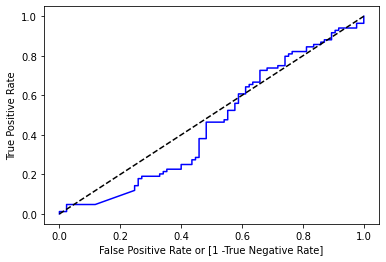

In [81]:
run_SVC(X_train,y_train,X_test,y_test)

# KNeighborsClassifier

Training Score : 0.7644 

Accuracy : 0.7041 



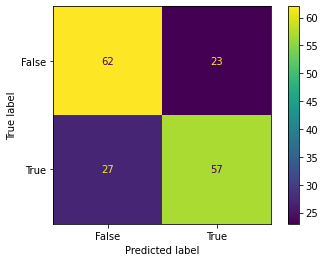

Precision Score : 0.7125 
 

Recall Score : 0.6786 

Classification Report :  
               precision    recall  f1-score   support

           0       0.70      0.73      0.71        85
           1       0.71      0.68      0.70        84

    accuracy                           0.70       169
   macro avg       0.70      0.70      0.70       169
weighted avg       0.70      0.70      0.70       169
 

ROC_AUC Score : 0.704 

ROC_AUC Curve :



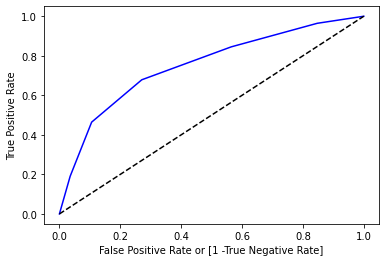

In [82]:
run_knn(X_train,y_train,X_test,y_test)

#### Here we have checked accuracy after handling Imbalanced data

#### By observing Accuracy,Precision,Recall,Roc_auc score we can say that XGB Classifier performs good

# Predictions On test Data By Using XGB_Classifier

In [83]:
test_data_=pd.read_csv('Test_Loan_Home.csv')

In [84]:
test_data_.dropna(inplace=True)
test_data_.drop_duplicates(inplace=True)

In [85]:
test_data_.reset_index(inplace=True,drop=True)

In [86]:
test_data = test_data_.drop('Loan_ID',axis=1)

In [87]:
test_data['Dependents'].replace('3+',3,inplace=True)

In [88]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [89]:
#Transforming Categorical features into numeric
label_encoder = LabelEncoder()

test_data['Gender']= label_encoder.fit_transform(test_data['Gender'])
test_data['Married']= label_encoder.fit_transform(test_data['Married'])
test_data['Education']= label_encoder.fit_transform(test_data['Education'])
test_data['Self_Employed']= label_encoder.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']= label_encoder.fit_transform(test_data['Property_Area'])
test_data=test_data.astype('int')

In [90]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110,360,1,2
1,1,1,1,0,0,3076,1500,126,360,1,2
2,1,1,2,0,0,5000,1800,208,360,1,2
3,1,0,0,1,0,3276,0,78,360,1,2
4,1,1,0,1,1,2165,3422,152,360,1,2


In [91]:
test_data.rename(columns={'ApplicantIncomeMonthly':'ApplicantIncome','CoapplicantIncomeMonthly':'CoapplicantIncome',
                          'LoanAmountThousands':'LoanAmount','Loan_Amount_Term_Months':'Loan_Amount_Term'},inplace=True)

In [92]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110,360,1,2
1,1,1,1,0,0,3076,1500,126,360,1,2
2,1,1,2,0,0,5000,1800,208,360,1,2
3,1,0,0,1,0,3276,0,78,360,1,2
4,1,1,0,1,1,2165,3422,152,360,1,2


In [93]:
Xgb_Classifier = XGBClassifier(random_state=42)
Xgb_Classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [94]:
prediction = Xgb_Classifier.predict(test_data)

In [95]:
Submission_file = pd.DataFrame({'Loan_ID':test_data_['Loan_ID'],'Loan_Status':prediction})

In [98]:
Submission_file.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001051,0
4,LP001054,1


In [97]:
Submission_file.to_csv('Submission_file',index=False)

# =============================================================

# =============================================================